In [1]:
# 1장 둘러보기

# 텍스트 분류

from transformers import pipeline

classifier = pipeline("text-classification")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


In [2]:
#  분류 대상
text = """Dear Amazon, last week I ordered an Optimus Prime action figure \
from your online store in Germany. Unfortunately, when I opened the package, \
I discovered to my horror that I had been sent an action figure of Megatron \
instead! As a lifelong enemy of the Decepticons, I hope you can understand my \
dilemma. To resolve the issue, I demand an exchange of Megatron for the \
Optimus Prime figure I ordered. Enclosed are copies of my records concerning \
this purchase. I expect to hear from you soon. Sincerely, Bumblebee."""

In [3]:
# 텍스트 분류

import pandas as pd 

outputs = classifier(text)
pd.DataFrame(outputs)

,label,score
0,NEGATIVE,0.901547


In [4]:
# ner

ner_tagger = pipeline("ner")

outputs = ner_tagger(text)
pd.DataFrame(outputs)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english)


,entity,score,index,word,start,end
0,I-ORG,0.879010,2,Amazon,5,11
1,I-MISC,0.994601,9,Op,36,38
2,I-MISC,0.987668,10,##ti,38,40
3,I-MISC,0.992774,11,##mus,40,43
4,I-MISC,0.988392,12,Prime,44,49
5,I-LOC,0.999755,20,Germany,90,97
6,I-MISC,0.556570,44,Mega,208,212
7,I-PER,0.590256,45,##tron,212,216
8,I-ORG,0.654192,54,Dec,253,256
9,I-ORG,0.685193,55,##ept,256,259


![transformerProcess](https://camo.githubusercontent.com/91f07ff7f213596a0d1518aca8b328152e34b0b930cc40fd51fda5ecbef04b2d/68747470733a2f2f6769746875622e636f6d2f7269636b69657061726b2f6e6c702d776974682d7472616e73666f726d6572732f626c6f622f6d61696e2f696d616765732f6368617074657230325f68662d6c69627261726965732e706e673f7261773d31)

In [5]:
# 데이터셋 가져와보기

from datasets import load_dataset


emotions = load_dataset("SetFit/emotion")

Using custom data configuration SetFit___emotion-89147fdf376d67e2
Reusing dataset json (C:\Users\Harvester-PC\.cache\huggingface\datasets\json\SetFit___emotion-89147fdf376d67e2\0.0.0\c2d554c3377ea79c7664b93dc65d0803b45e3279000f993c7bfd18937fd7f426)


  0%|          | 0/3 [00:00<?, ?it/s]

In [6]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 16000
    })
    test: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 2000
    })
    validation: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 2000
    })
})

In [7]:
# SetFit/emotion 데이터셋의 경우 수동으로 ClassLabel 객체를 만들어 label에 할당합니다.
from datasets import ClassLabel

emotions['train'].features['label'] = ClassLabel(
    num_classes=6, 
    names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])

In [8]:
import pandas as pd

emotions.set_format(type="pandas")
df = emotions["train"][:]
df.head()

,text,label,label_text
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [9]:
emotions["train"].features['label'].__class__

datasets.features.features.ClassLabel

In [10]:
def label_int2str(row):
    return emotions["train"].features["label"].int2str(row)

df["label_name"] = df["label"].apply(label_int2str)
df.head()

,text,label,label_text,label_name
0,i didnt feel humiliated,0,sadness,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger,anger
3,i am ever feeling nostalgic about the fireplac...,2,love,love
4,i am feeling grouchy,3,anger,anger


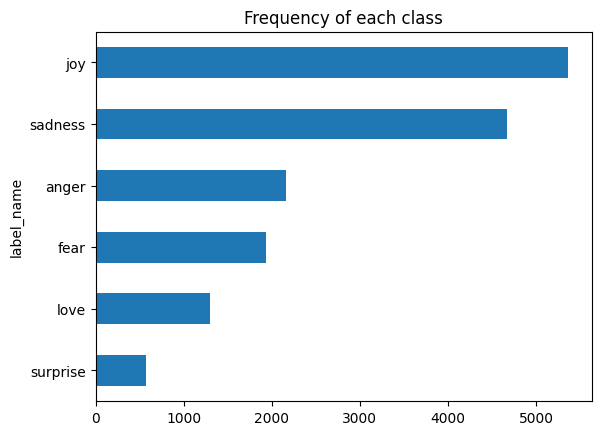

In [11]:
# 클래스 분포 살펴보기

import matplotlib.pyplot as plt

df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of each class")
plt.show()

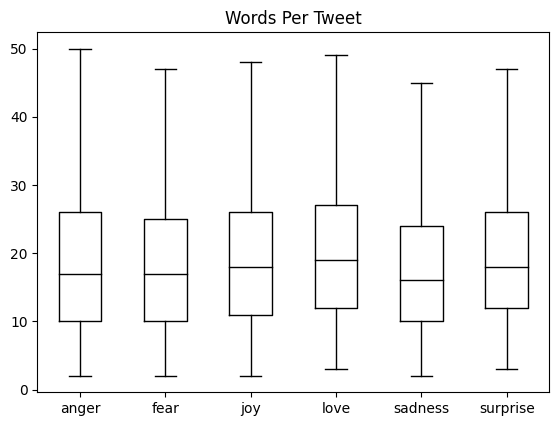

In [12]:
# 트윗의 길이 확인

df["Words Per Tweet"] = df["text"].str.split().apply(len)
df.boxplot("Words Per Tweet", by="label_name", grid=False,showfliers=False,color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [13]:
# 텍스트 -> 토큰

# 문자 토큰
text = "Tokenizing Text is core task of NLP."
tokenized_text = list(text)
print(tokenized_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 'T', 'e', 'x', 't', ' ', 'i', 's', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P', '.']


In [14]:
# Numericalization -> 각 토큰을 고유한 정수로 인코딩
token2idx = {ch: idx for idx, ch in enumerate(set(tokenized_text))}
print(token2idx)

{'.': 0, 'T': 1, 'k': 2, 'f': 3, 't': 4, 'e': 5, 's': 6, 'z': 7, 'L': 8, 'N': 9, 'g': 10, 'o': 11, 'n': 12, 'c': 13, 'r': 14, 'x': 15, 'P': 16, 'a': 17, ' ': 18, 'i': 19}


In [15]:
# vocabalary에 있는 각 문자를 고유한 정수로 바꾸는 매핑 딕셔너리
# token2idx를 사용해 토큰화된 텍스트를 정수 리스트로 변환

input_ids = [token2idx[token] for token in tokenized_text]

print(input_ids)

[1, 11, 2, 5, 12, 19, 7, 19, 12, 10, 18, 1, 5, 15, 4, 18, 19, 6, 18, 13, 11, 14, 5, 18, 4, 17, 6, 2, 18, 11, 3, 18, 9, 8, 16, 0]


In [16]:
# One-hot Vector - 머신러닝에서 ordinal(순서) 또는 nominal(명목) 범주 데이터를 인코딩 하기 위해 자주 사용
# 트랜스포머 시리즈 캐릭터 인코딩

categorical_df = pd.DataFrame(
    {"Name":["Bumblebee", "Optimus Prime", "Megatron"],"Label ID":[0,1,2]}
)
print(categorical_df)

            Name  Label ID
0      Bumblebee         0
1  Optimus Prime         1
2       Megatron         2


In [17]:
# 이 방식은 이름 사이 가상의 순서가 만들어진다는 문제 존재
# 신경망은 이런 종류 관ㅖ를 학습하는 능력 뛰어남
# 범주마다 새 열을 만들어 이름이 범주에 해당되는 경우 1, 아니면 0 할당

pd.get_dummies(categorical_df["Name"])

# 이렇게 생성된 행이 원-핫 벡터

,Bumblebee,Megatron,Optimus Prime
0,True,False,False
1,False,False,True
2,False,True,False


In [18]:
# 두개의 원핫 인코딩을 더한 결과는 쉽게 해석됨.

import torch
import torch.nn.functional as F

input_ids = torch.tensor(input_ids)
one_hot_encodings = F.one_hot(input_ids,num_classes=len(token2idx))
print(one_hot_encodings.shape)

torch.Size([36, 20])


In [19]:
print(f"토큰: {tokenized_text[0]}")
print(f"텐서 인덱스:{input_ids[0]}")
print(f"원-핫 인코딩: {one_hot_encodings[0]}")

토큰: T
텐서 인덱스:1
원-핫 인코딩: tensor([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [20]:
# 단어 토큰화 word tokenization
# 토큰화를 하며 텍스트의 구조를 유지하는 간단한 방법
# 텍스트를 문자가 아닌 단어로 분할한 후 정수로 매핑

tokenized_text = text.split()
print(tokenized_text)

['Tokenizing', 'Text', 'is', 'core', 'task', 'of', 'NLP.']


In [21]:
emotions.reset_format()

In [22]:
# 부분 단어 토큰화
# 기본적으로 문자 토큰화 및 단어 토큰화의 장점을 결합
# 트랜스포머는 AutoTokenizer 클래스를 제공

from transformers import AutoTokenizer

model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [23]:
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 19204, 6026, 3793, 2003, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [24]:
# AutoToknizer클래스는 체크포인트 이름을 통해 모델의 설정 pretrained된 가중치
# 어휘사전을 자동으로 추출하는 자동 클래스

from transformers import AutoTokenizer

distilbert_tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [25]:
# 문자 토큰화 처럼 단어가 input_ids 필드에 있는 고유한 정수에 매핑됨
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 19204, 6026, 3793, 2003, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [26]:
# 특수 토큰인 [CLS]와 [SEP]가 시퀀스 처음 끝에 추가
# 주요 역할은 시퀀스 시작과 끝을 알림
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'token', '##izing', 'text', 'is', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]']


In [27]:
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] tokenizing text is core task of nlp. [SEP]


In [28]:
# 전체 데이터셋 토근화
# 전체 말뭉치 토큰화를 위해 DatasetDict 객체의 map() 메서드를 사용
# 샘플을 토큰화 할 처리 함수

def tokenize(batch):
    # padding=True는 배치에 있는 가장 긴 샘플 크기에 맞춰 샘플을 0으로 패딩
    # truncation=True는 모델의 최대 문맥 크기에 맞춰 샘플을 잘라냄
    return tokenizer(batch["text"],padding=True,truncation=True)

In [29]:
# 패딩 결과
print(tokenize(emotions["train"][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [30]:
tokens2ids=list(zip(tokenizer.all_special_tokens,tokenizer.all_special_ids))
data = sorted(tokens2ids,key=lambda x:x[-1])
df = pd.DataFrame(data,columns=["Special Token","Special Token ID"])

print(df.T)

                      0      1      2      3       4
Special Token     [PAD]  [UNK]  [CLS]  [SEP]  [MASK]
Special Token ID      0    100    101    102     103


In [31]:
emotions_encoded = emotions.map(tokenize,batched=True,batch_size=None)

Parameter 'function'=<function tokenize at 0x000001BA2D3541F0> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [32]:
# 텍스트 분류모델 학습하기

# 사전 훈련된 모델 사용
from transformers import AutoModel

model_ckpt = "distilbert-base-uncased"
# 쿠다 사용
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [33]:
# 마지막 은닉 상태 추출하기
text = "this is a test"
# 텐서로 반환하도록 지정
inputs = tokenizer(text,return_tensors="pt")

print(f"입력 텐서 크기 :{inputs['input_ids'].size()}")

입력 텐서 크기 :torch.Size([1, 6])


In [34]:
# 결과 텐서의 크기는 [batch_size,n_tokens]
# 인코딩을 텐서로 준비했으므로, 마지막 단계로 이를 모델이 있는 장치로 옮기고 입력으로 전달


inputs = {k:v.to(device) for k,v in inputs.items()}
with torch.no_grad():
    # 그래디언트 계산 비활성화
    # - 계산에 필요한 메모리 양이 줄어 추론에 유리함
    outputs = model(**inputs)
    
print(outputs)

# 마지막 은닉 상태의 크기
# 은닉 상태의 크기는 [batch_size,n_tokens,hidden_size]
# 6개의 입력 토큰마다 768차원의 벡터를 반환
print(outputs.last_hidden_state.size())

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]]), hidden_states=None, attentions=None)
torch.Size([1, 6, 768])


In [35]:
#분류 작업에서는 보통 [CLS]토큰에 연관된 은닉 상태를 입력 특성으로 사용
# 이 토큰은 시퀀스 시작에 등장하므로 다음과 같이 인덱스 지정하여 추출

outputs.last_hidden_state[:,0].size()

torch.Size([1, 768])

In [36]:
def extract_hidden_states(batch):
    # 모델 입력을 GPU로 옮김
    inputs = {k:v.to(device) for k,v in batch.items() if k in tokenizer.model_input_names}
    # 마지막 은닉상태를 추출
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
    # [CLS] 토큰에 대한 벡터 반환
    # 마지막 은닉상태를 벡터로 반환
    return {"hidden_state":last_hidden_state[:,0].cpu().numpy()}

In [37]:
# 모델이 텐서값의 입력을 원하므로 
# inputs_ids와 attention_mask열을 torch 포맷으로 바꿈

emotions_encoded.set_format("torch",columns=["input_ids","attention_mask","label"])

In [38]:
# 모든 분할에 대한 은닉상태를 한번에 추출
# 기본 batchsize는 1000
emotions_hidden = emotions_encoded.map(extract_hidden_states,batched=True)

  0%|          | 0/16 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

In [39]:
# 각 트윗에 대한 은닉 상태는 hiddenstate로

emotions_hidden["train"].column_names

['attention_mask', 'hidden_state', 'input_ids', 'label', 'label_text', 'text']

In [40]:
import numpy as np 

# 특성행렬 만들기

X_train = np.array(emotions_hidden["train"]["hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])
y_train = np.array(emotions_hidden["train"]["label"])
y_valid = np.array(emotions_hidden["validation"]["label"])

X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

In [42]:
# 훈련세트 시각화
# UMAP을 이용하여 벡터를 2D로 투영
# UMAP은 벡터를 2D 또는 3D로 투영하는 비지도 학습 알고리즘
# UMAP은 주로 [0,1] 범위에 놓일때 잘 동작

from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

# 특성 스케일을 [0,1] 범위로 조정
X_scaled = MinMaxScaler().fit_transform(X_train)
# UMAP 객체를 생성하고 훈련함
mapper = UMAP(n_components=2,metric="cosine").fit(X_scaled)
# 2D 임베딩의 데이터 프레임을 만듬
df_emb = pd.DataFrame(mapper.embedding_,columns=["x","y"])
df_emb["label"] = y_train
df_emb.head()

,x,y,label
0,4.185075,6.209141,0
1,-2.980752,5.024344,0
2,5.391989,2.753979,3
3,-2.141329,3.192975,2
4,-3.103261,3.080045,3


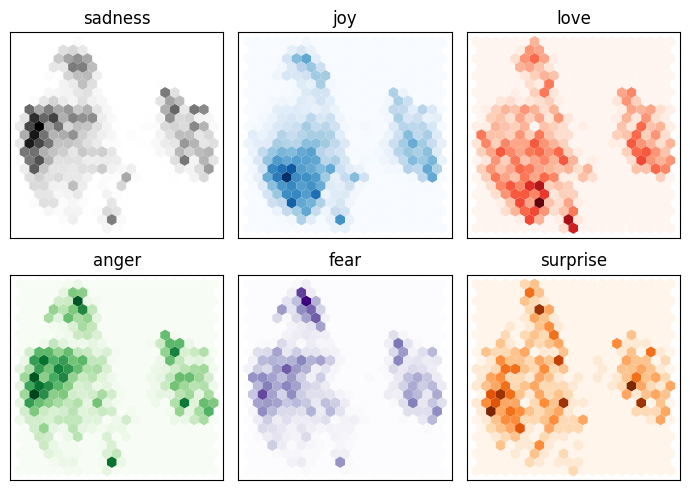

In [44]:
# 각 범주에 대한 샘플의 밀도

fig, axes = plt.subplots(2,3,figsize=(7,5))
axes = axes.flatten()
cmaps = ["Greys","Blues","Reds","Greens","Purples","Oranges"]
labels = emotions["train"].features["label"].names

for i, (label, cmap) in enumerate(zip(labels,cmaps)):
    df_emb_sub = df_emb.query(f"label == {i}")
    axes[i].hexbin(df_emb_sub["x"],df_emb_sub["y"], cmap=cmap, gridsize=20, linewidths=(0,))
    axes[i].set_title(label)
    axes[i].set_xticks([]), axes[i].set_yticks([])
    
plt.tight_layout()
plt.show()

In [47]:
from sklearn.linear_model import LogisticRegression

# 수렴을 보장하기 위해 max_iter 증가
# 은닉 상태를 이용한 LogisticRegression 모델 훈련
lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train,y_train)
lr_clf.score(X_valid,y_valid)

0.6335

In [46]:
# DummyClassifier로 학습해보기

from sklearn.dummy import DummyClassifier  

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train,y_train)
dummy_clf.score(X_valid,y_valid)

0.352

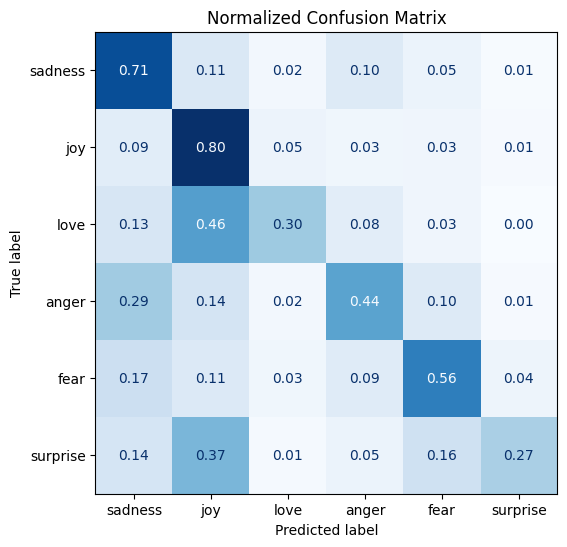

In [48]:
# 오차행렬 Confusion Matrix
# 진짜레이블과 예측레이블의 관계를 보여줌

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds,y_true,labels):
    cm = confusion_matrix(y_true,y_preds,normalize="true")
    fig, ax = plt.subplots(figsize=(6,6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
    disp.plot(cmap="Blues",ax=ax,values_format=".2f",colorbar=False)
    plt.title("Normalized Confusion Matrix")
    plt.show()

y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds,y_valid,labels=labels)

In [49]:
# Pretrained된 모델 로드하기

from transformers import AutoModelForSequenceClassification
# 사전 훈련된 DistilBert 모델 로드
# AutoModelForSequenceClassification 클래스는 사전 훈련된 모델 출력 위에 base model과 함꼐
# 쉽게 훈련할 수 있는 분류 헤드 존재
# 분류 헤드의 출력 크기를 설정하기 위해 모델이 예측할 레이블 갯수 (여기서는 6개)

num_labels = 6

model = (AutoModelForSequenceClassification.from_pretrained(model_ckpt,num_labels=num_labels).to(device))

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'pre_classifier.bias', 'classifier

In [50]:
# 성공 지표 정의하기

from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    acc = accuracy_score(labels,preds)
    f1 = f1_score(labels,preds,average="weighted")
    return {"accuracy":acc,"f1":f1}

In [84]:
# 모델 훈련 하기
from huggingface_hub import notebook_login

notebook_login()

In [87]:
from transformers import Trainer, TrainingArguments

# 배치 사이즈
batch_size = 64

# 로깅 스탭
logging_steps = len(emotions_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned-emotion"
# 훈련 인수 정의
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=False, 
                                  save_strategy="epoch",
                                  load_best_model_at_end=True,
                                  log_level="error")

In [88]:
from transformers import Trainer

trainer = Trainer(model=model,args=training_args,compute_metrics=compute_metrics,train_dataset=emotions_encoded["train"],eval_dataset=emotions_encoded["validation"],tokenizer=tokenizer)

trainer.train()

Epoch,Training Loss,Validation Loss
